In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scripts import *
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
data = aggregate_data()
data['Ones'] = 1
data['Status_numeric'] = data['Status'].apply(lambda x: eval_obs_status(x))

In [4]:
data['Frequency'] = data['Frequency'].apply(lambda x: fix_freqs(x))
data['Frequency'] = data['Frequency'].astype(int)

In [5]:
data['Band'] = data['Frequency'].apply(lambda x: label_band(x))
data['Band'].value_counts()

UHF    20783
VHF     6320
GHZ       61
Name: Band, dtype: int64

In [6]:
index = list(set(data['Band'].values))

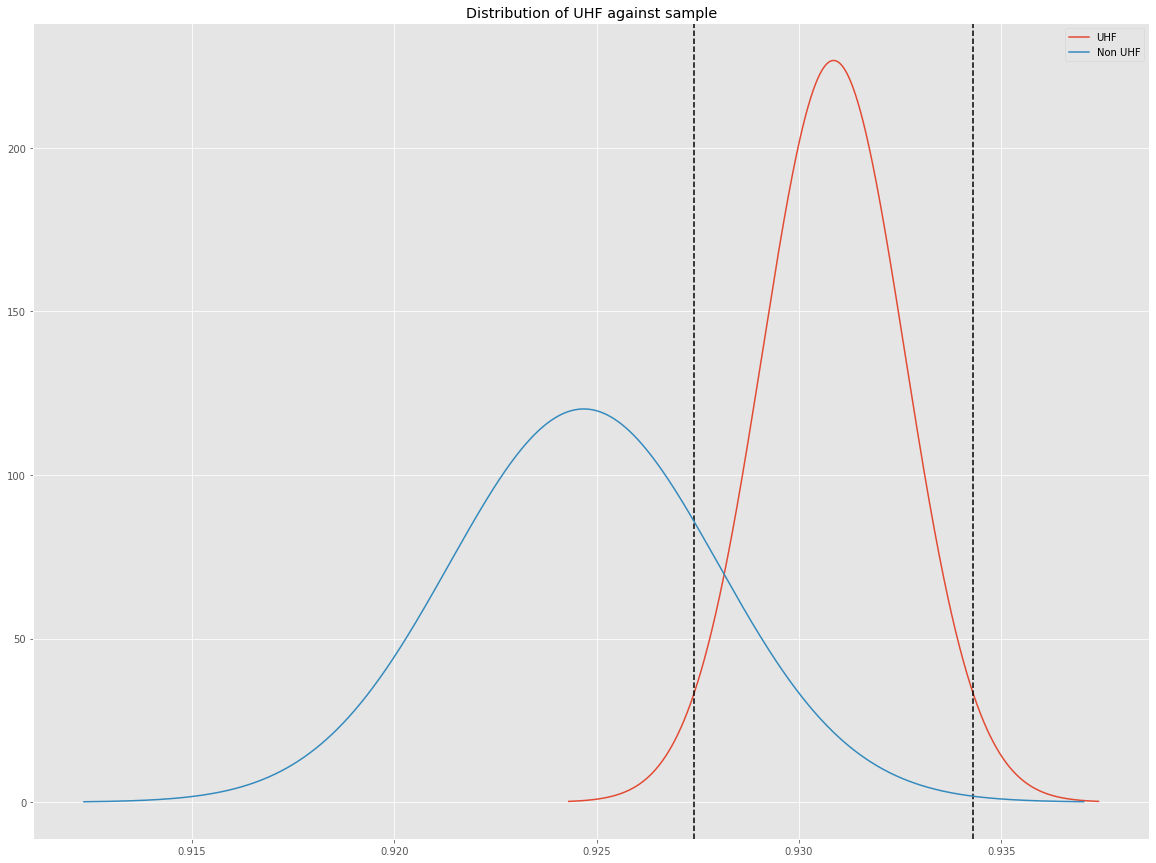

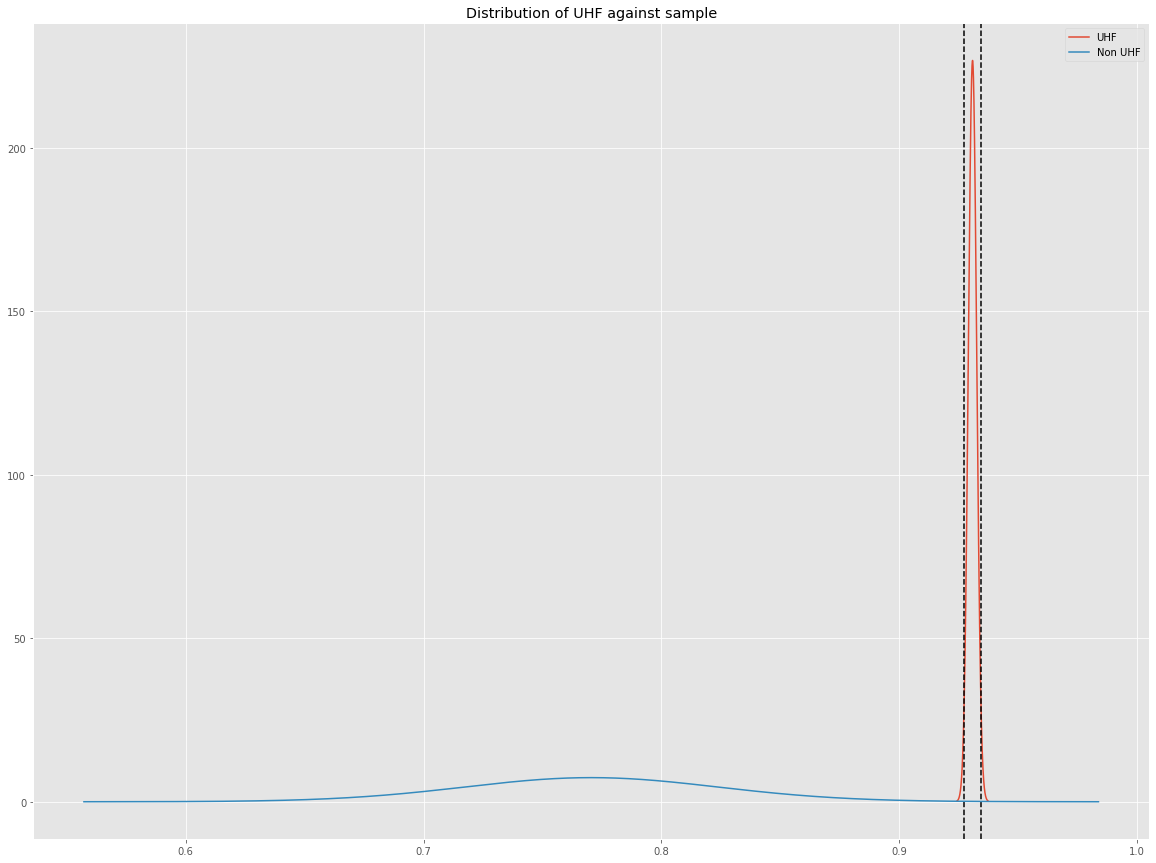

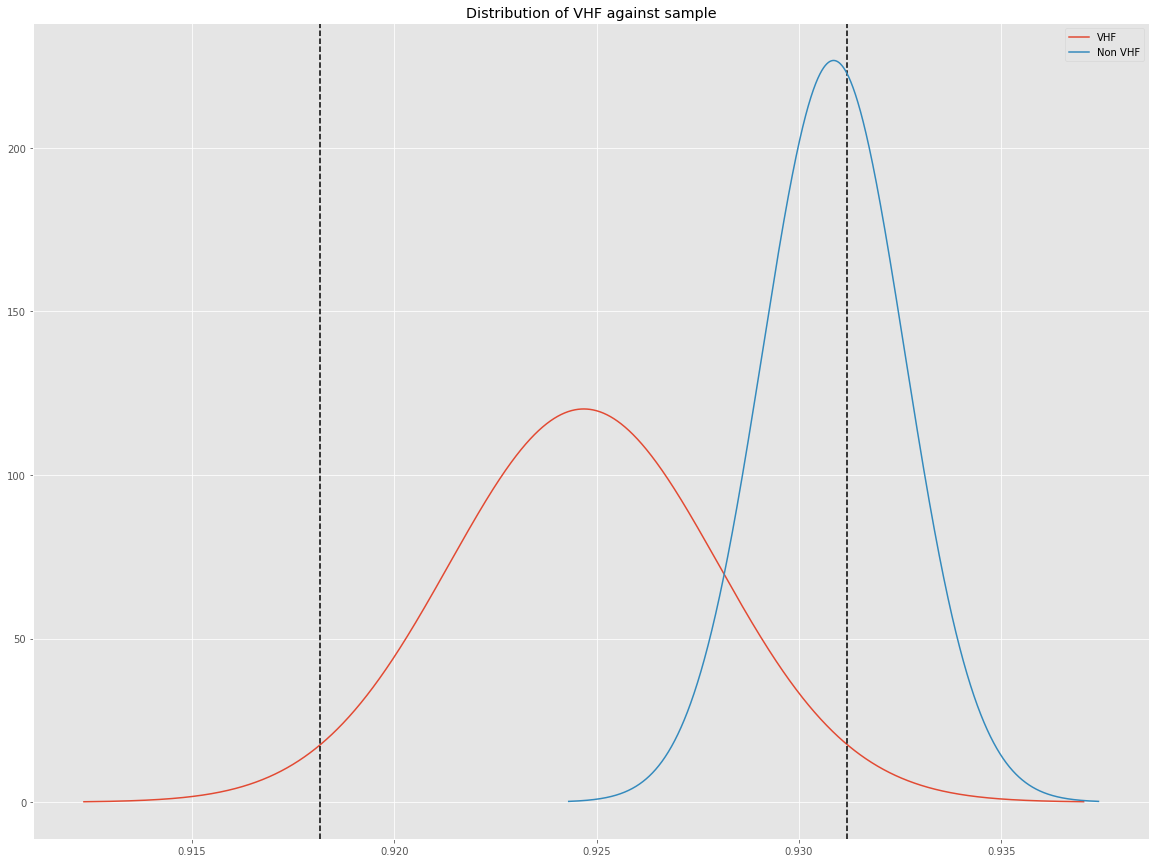

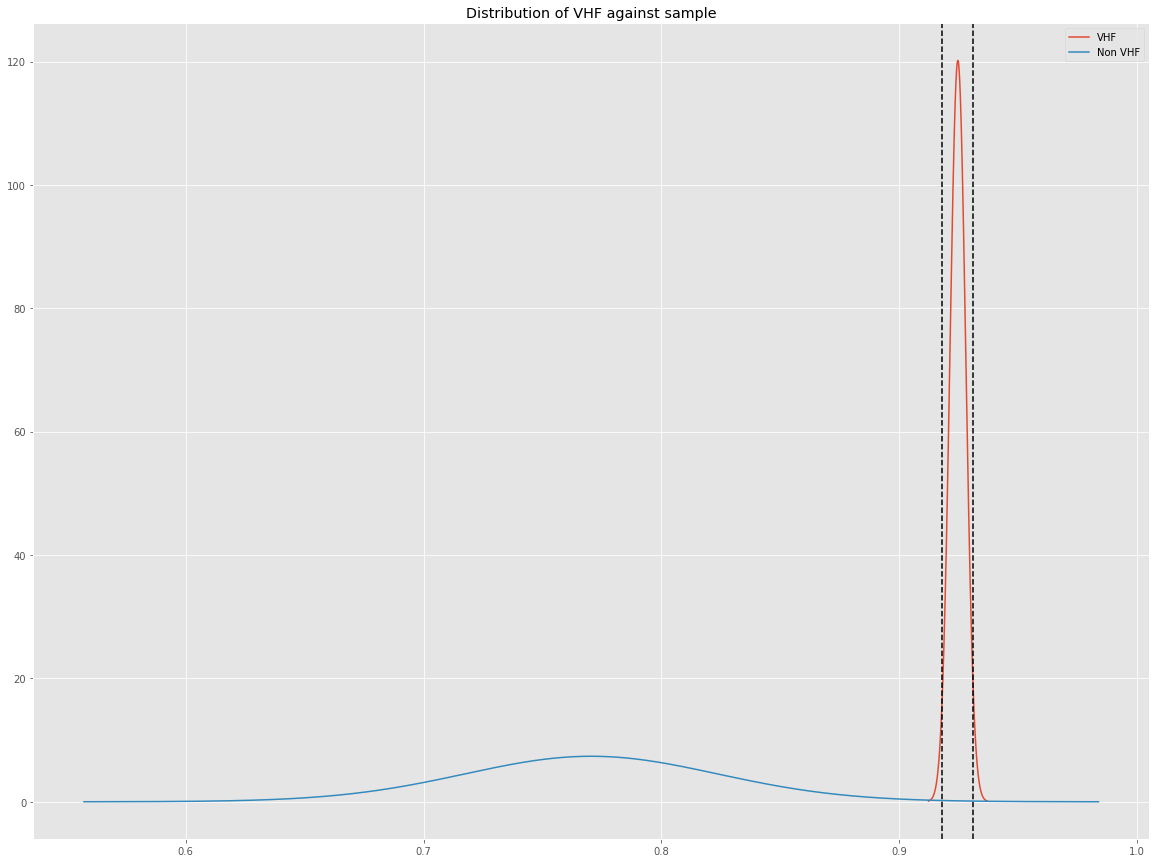

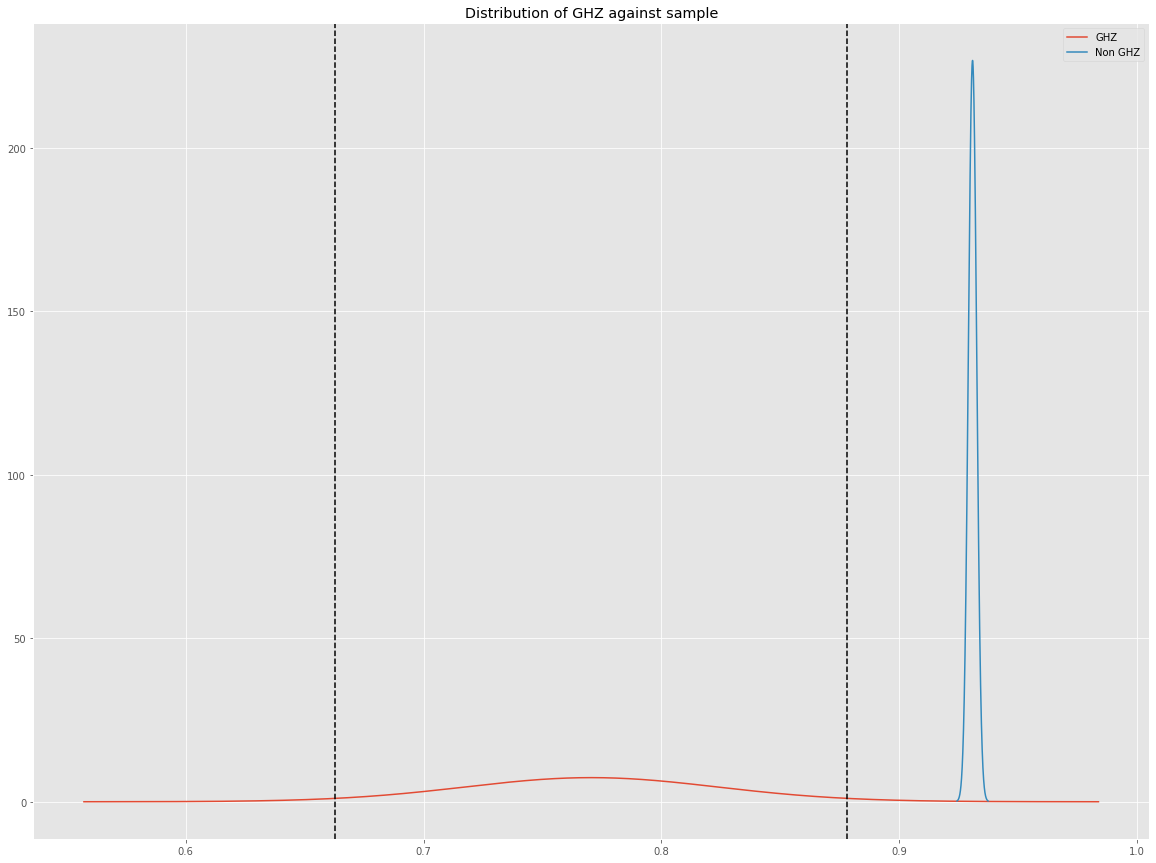

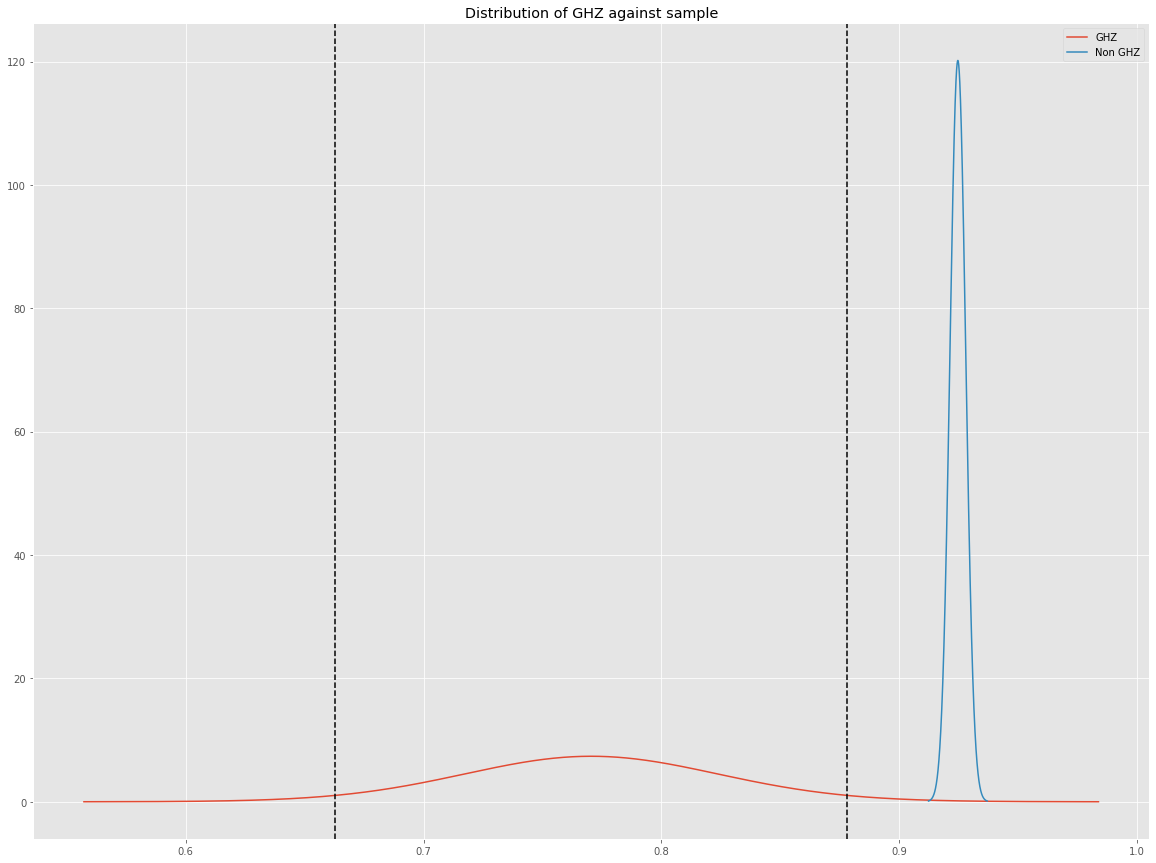

In [7]:
hypothesis_test_column(data, index, 'Band','Status_numeric','../hypothesis_tests/band/', alpha = 0.05)

In [8]:
hypothesis_test_greater_counts(data, index, 'Band', alpha = 0.05)

In [9]:
def get_t_dist(data):
    mean = np.mean(data)
    se = np.std(data) / len(data)**0.5
    return stats.t(df = len(data)-1, loc = mean, scale = se)

In [10]:
def get_crit(dist, alpha=0.05, tail='two-sided'):
    if tail =='two-sided':
        lower = alpha/2
        upper = 1 - alpha/2
        return [dist.ppf(lower),dist.ppf(upper)]
    elif tail == 'greater':
        upper = 1 - alpha
        return [dist.ppf(upper)]
    elif tail == 'less':
        return [dist.ppf(alpha)]

In [11]:
def create_exclusive_histogram(data, column, value, target,target_alternative = None, alpha = 0.05, tail='two-sided'):
    
    data_test =data[data[column] == target]
    data_test = data_test[value]
    if target_alternative is None:
        data_other = data[data[column] != target]
        data_other = data_other[value]
    else:
        data_other = data[data[column] == target_alternative]
        data_other = data_other[value]
    
    dist_test = get_t_dist(data_test)
    dist_other = get_t_dist(data_other)
    
    fig, ax = plt.subplots(figsize=(20, 15))
    x1 = np.linspace(dist_test.ppf(0.0001),dist_test.ppf(0.9999), 2000)
    x2 = np.linspace(dist_other.ppf(0.0001),dist_other.ppf(0.9999), 2000)
    ax.plot(x1, dist_test.pdf(x1), label=target);
    
    [ax.axvline(x, color='black', linestyle='--') for x in get_crit(dist_test, alpha, tail)]
    
    ax.plot(x2, dist_other.pdf(x2), label=f'Non {target}');
    ax.legend(loc='best')
    ax.set_title(f"Distribution of {target} against sample")
    fig.savefig(file_name, format='png')
    return file_name

NameError: name 'file_name' is not defined

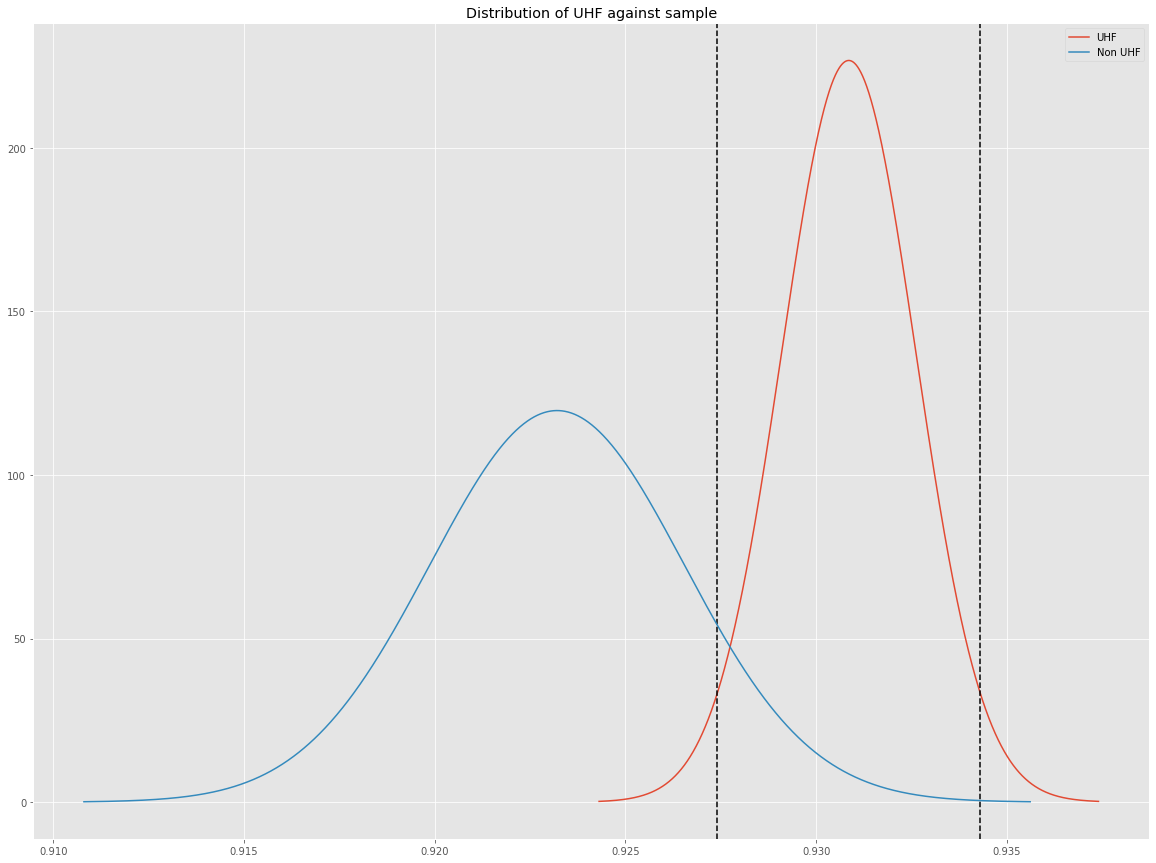

In [12]:
create_exclusive_histogram(data, 'Band','Status_numeric', 'UHF')